In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

from IPython.core.display import display, HTML
from IPython.display import Markdown as md

from matplotlib.ticker import EngFormatter

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def myround(x, base=5):
    return base * round(x/base)

# Estilo verde-rojito
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val > 0 else 'black'
    if val < 0: color = 'green'
    return 'color: %s' % color

# Estilo gris
def color_gray(val):
    color = '.5'
    return 'color: %s' % color


In [3]:
display(HTML("<style>.rendered_html {font-size: 16px; line-height: 1.8; text-indent: 2rem}</style>"))
# display(HTML("<style>.rendered_html {  }</style>"))

In [4]:
frac = 0.02

In [5]:
nfiles_in_data = 4

In [6]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]

radio_ref = pd.read_csv('./../data/info/radio_ref.csv')
# radio_ref[['PROV','NOMPROV','DPTO', 'NOMDPTO']].drop_duplicates().to_csv('./data/DPTO_PROV.csv', index = False)
dpto_region = pd.read_csv('./../data/info/DPTO_PROV_Region.csv')
radio_ref = radio_ref.merge(dpto_region)
radio_ref = radio_ref[['RADIO_REF_ID', 'NOMDPTO','NOMPROV', 'AGLOMERADO', 'Region']].drop_duplicates().merge(aglo_labels)


# data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2020.csv')
data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2019-2020.csv')

data['Grupo Etario'] = pd.cut(data.P03, np.arange(-1, 80, 3))#.round(-1) ## Customizar grupo etario

data = data.merge(radio_ref, on = ['RADIO_REF_ID', 'AGLOMERADO'])
data['AGLO_si'] = data.AGLOMERADO != 0

pob_tot = len(data)/frac/nfiles_in_data
pob_tot

44505237.5

In [16]:
# Cantidad de trabajadores
# (data.groupby(['CONDACT']).size()/frac/nfiles_in_data)#/len(data)
# 20166050+1794312.5 = 21960362.5

# Ingresos de hogares, pobreza e indigencia. (Argentina)

Matias Iglesias

matuteiglesias@gmail.com


# Introducción. 

Este reporte presenta estimaciones de ingreso medio de hogares y personas en todo el territorio de la Republica Argentina a partir de la información en la Encuesta Permanente de Hogares (EPH) y el Censo de Población, Hogares y Viviendas de 2010, realizados por el Instituto Nacional de Estadística y Censos (INDEC).

Explotando las variables en común contenidas en ambas fuentes se entrenan algoritmos de clasificación y regresión que predicen los ingresos de muestras sintéticas de la población total consultada en Censo. O sea *machine learning* aplicado al Censo y las encuestas de hogares. Esto permite obtener valores de ingresos, incidencia de pobreza e indigencia y otras variables socioeconómicas segun características demográficas y habitacionales de las provincias, areas metropolitanas, departamentos, partidos, comunas u otras areas censales detalladas.

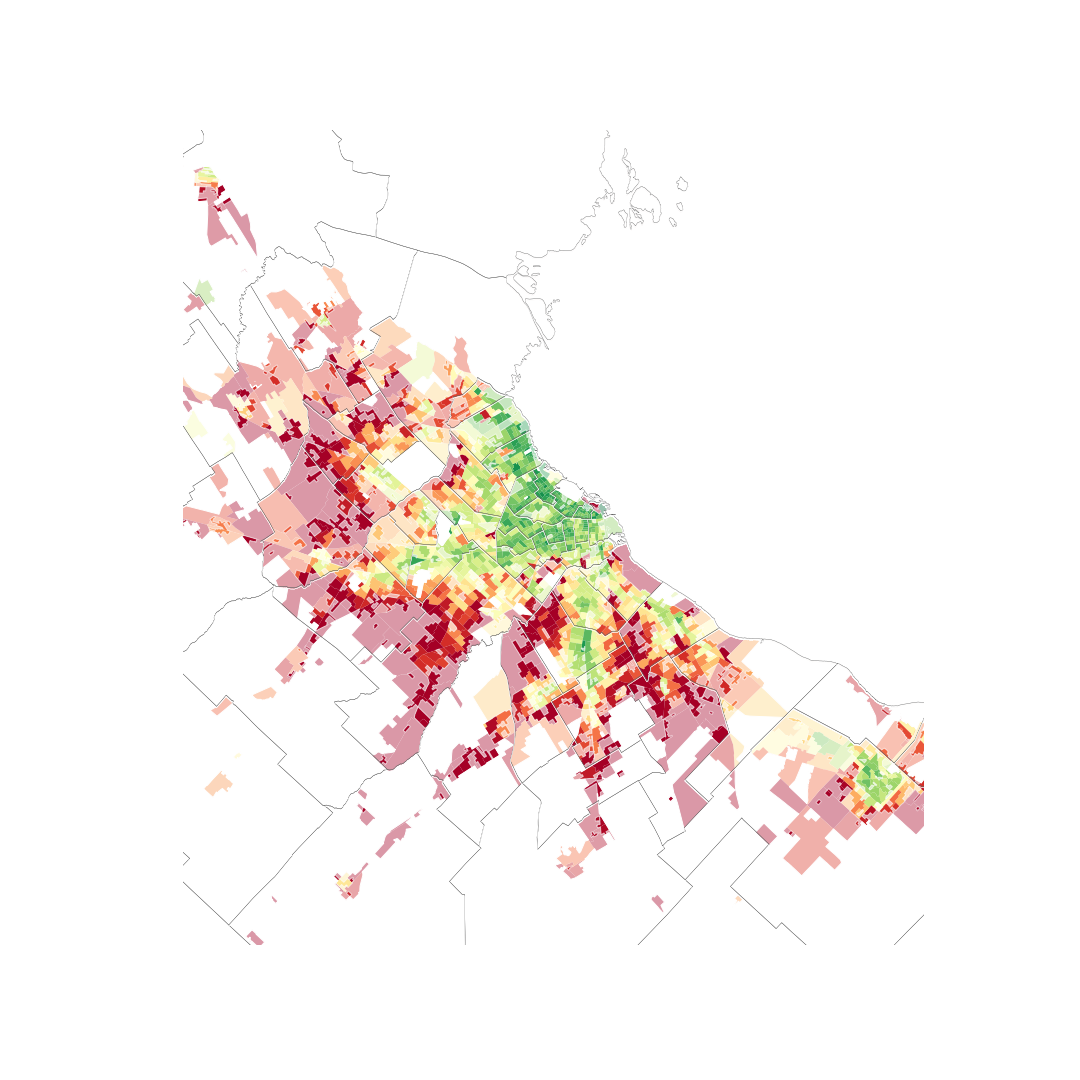

In [8]:
from IPython.display import Image
Image("./mapa_portada.png")

# Contenido
- Incidencia de pobreza e indigencia
- Evolucion semestral

    - Cantidades (miles)
    - Porcentajes

- Ingresos a precios constantes (ARS 2019Q2)
    - Deciles de ingreso
    - Lineas de Pobreza e indigencia

- Dependencia con otras variables
    - Habitaciones de la vivienda
    - Edad
    - Niveles educativos

- Dependencia geografica
    - Variacion regional
    - Por departamento y fraccion censal
    - Por Provincia
    - Por Region y aglomerado
    - Partidos y Comunas del AMBA
    
- Evolucion temporal por areas especificas.

- Lista de Aglomerados

# Incidencia de pobreza e indigencia
## Total Pais

In [78]:
## Personas
base_str = 'P'; grouper = ['Q', 'Total_pais']
info = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()
info['Q'] = pd.to_datetime(info['Q'])

table = info.loc[info.observable.isin(['Pobreza', 'Indigencia'])].set_index(['observable', 'sintetico'] + grouper)['valor']
table = table.unstack([-1, -2])
table.loc[table.index.get_level_values('sintetico') == 'mean'] = 100*table.loc[table.index.get_level_values('sintetico') == 'mean'].round(3)
table.loc[table.index.get_level_values('sintetico') == 'sum'] = table.loc[table.index.get_level_values('sintetico') == 'sum'].round(-3).astype(int).astype(str)
table.sort_index(axis = 1).iloc[:, -4:]


Total_pais                 True                                 
Q                    2019-11-15 2020-02-15 2020-05-15 2020-08-15
observable sintetico                                            
Indigencia mean            15.7       13.3         16         13
           sum          6944000    5934000    7157000    5818000
Pobreza    mean              49         42       51.5       44.6
           sum         21674000   18748000   22983000   19900000

In [85]:
## Hogares
base_str = 'H'; grouper = ['Q', 'Total_pais']
info = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()
info['Q'] = pd.to_datetime(info['Q'])

table = info.loc[info.observable.isin(['Pobreza', 'Indigencia'])].set_index(['observable', 'sintetico'] + grouper)['valor']
table = table.unstack([-1, -2])
table.loc[table.index.get_level_values('sintetico') == 'mean'] = 100*table.loc[table.index.get_level_values('sintetico') == 'mean'].round(3)
table.loc[table.index.get_level_values('sintetico') == 'sum'] = table.loc[table.index.get_level_values('sintetico') == 'sum'].round(-3).astype(int).astype(str)
table = table.sort_index(axis = 1).iloc[:, -4:]
table

Total_pais                 True                                 
Q                    2019-11-15 2020-02-15 2020-05-15 2020-08-15
observable sintetico                                            
Indigencia mean            11.6        9.8       12.3        9.8
           sum          1546000    1325000    1656000    1329000
Pobreza    mean              39       32.4       40.5       34.6
           sum          5211000    4366000    5470000    4675000

In [9]:

md("En el tercer trimestre de 2020, la pobreza alcanza el {:.0f}".format(x.loc[('Pobreza', 'Hogares')].Porcentaje)+"% \
   de los hogares, donde viven el {:.0f}".format(x.loc[('Pobreza', 'Personas')].Porcentaje)+"% de las personas ({:.1f}".format(0.001*x.loc[('Pobreza', 'Personas')]['Cantidad (miles)'])+" millones). \
   La indigencia en el mismo periodo alcanza al {:.1f}".format(x.loc[('Indigencia', 'Hogares')].Porcentaje)+"% de los hogares, en donde viven {:.1f}".format(0.001*x.loc[('Indigencia', 'Personas')]['Cantidad (miles)'])+" millones de\
   personas ({:.1f}".format(x.loc[('Indigencia', 'Personas')].Porcentaje)+"%)")
     

En el tercer trimestre de 2020, la pobreza alcanza el 35%    de los hogares, donde viven el 44% de las personas (19.6 millones).    La indigencia en el mismo periodo alcanza al 10.3% de los hogares, en donde viven 6.1 millones de   personas (13.8%)

## Evolucion Temporal

In [ ]:
# cuadro5['Pobreza']['mean'].unstack().plot()

In [87]:
cuadro5 = pd.read_csv('./../data/cuadros/cuadro4_'+str(frac)+'_ARG', index_col=[0, 1], header = [0, 1, 2])
df = cuadro5.iloc[:, cuadro5.columns.get_level_values(0).isin(['Indigencia', 'Pobreza'])
            & cuadro5.columns.get_level_values(2).isin(['Hogares', 'Personas'])]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette("tab10")
sns.set()

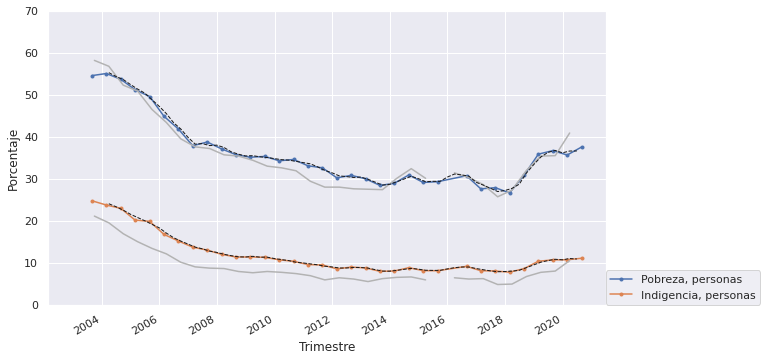

In [164]:
info = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()
info['Q'] = pd.to_datetime(info['Q'])

# Mean pobreza, indigencia
info_ = info.loc[info.sintetico == 'mean'].set_index(['observable'] + grouper)['valor']
#     plot_data = info_.unstack([1]).T

plot_data = info.groupby([pd.Grouper(freq = '6M', key='Q')] + list(info.columns[:-2])).agg({'valor': 'mean'}).unstack(0)['valor'].T

fig, ax = plt.subplots(1, figsize = (10, 6))

(100*plot_data['Pobreza']['mean']).plot(ax = ax, marker = '.')
(100*plot_data['Indigencia']['mean']).plot(ax = ax, marker = '.')

cedlas = pd.read_csv('./../data/info/CEDLAS.csv', decimal=',')
cedlas.index = pd.date_range(start = '2003-09-01', periods=len(cedlas), freq = '6M')
cedlas = cedlas[['Pobreza', 'Indigencia']].astype(float)
cedlas.plot(ax = ax, color = '.7')

# Moving Average
info_ = info.groupby(list(info.columns[:-1])).agg({'valor': 'mean'}).unstack(-1)['valor'].T
df_ = (100*info_['Pobreza']['mean'])
df_ = df_.resample('Q').mean().interpolate().rolling(4, center = True).mean()
df_.plot(ax = ax, color = 'k', linestyle = '--', lw = 1)
df_ = (100*info_['Indigencia']['mean'])
df_ = df_.resample('Q').mean().interpolate().rolling(4, center = True).mean()
df_.plot(ax = ax, color = 'k', linestyle = '--', lw = 1)


ax.legend(labels = ['Pobreza, personas', 'Indigencia, personas'], loc = (1, 0))
ax.set_ylim(0, 70)
ax.set_xlim(pd.Timestamp('2002-02-15'), pd.Timestamp('2021-07-01'))
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Trimestre')
plt.show()

Los puntos de este gráfico son los **valores promedios de los últimos 4 trimestres**. Previo a ese cálculo se interpola linealmente para tener los valores de los trimestres 2007-Q3, 2015-Q3, 2015-Q4, y 2016-Q1 para los cuales el INDEC no ofrece bases de microdatos.

En los últimos 15 años hay una tendencia de **descenso** de los niveles de pobreza.

***El dilema de 'Los numeros del INDEC'***

Existe un cuestionamiento de las series de índice de precios ofrecidas por INDEC entre 2007 y 2015. Los cálculos de los niveles de pobreza dependen de los valores en términos reales de las canastas alimentarias.

En este trabajo:
   * Se usan las canastas alimentaria y total regionales establecidas por INDEC desde 2016.
   * Construimos un indice de precios mensual de consenso entre las multiples mediciones disponibles en cada periodo.
   * El valor medio de las canastas de INDEC post 2016, a precios constantes se usa para los años anteriores.
   
De esta forma tenemos una regla fija para los niveles de pobreza en todo el período, **independiente de los índices de precios elaborados por INDEC**.

## Separacion 'aglomerados' vs resto del pais

In [13]:
#md("Los indicadores mas usados en determinar incidencia de pobreza se restringen a los llamados áglomerados urbanos'. La cifra de {:.0f}".format(x.loc[('Pobreza', 'Personas')].Porcentaje)+"% de las personas en pobreza difiere del 32.0% reportado por INDEC para el segundo semestre de 2018 los 33,6% reportados en el informe de UCA para 2018-Q3, principalmente por incluir la poblacion que vive fuera de los aglomerados urbanos.")

***La Encuesta de Hogares no releva zonas rurales***

El INDEC publica en informes semestrales los principales indicadores de pobreza e indigencia. La fuente primaria de información para ellos es la encuesta de hogares EPH. Sin embargo, esta última releva sólamente aglomerados urbanos grandes, dejando en un punto ciego al casi 9% de la poblacion que vive en zona rural, ademas de otro 25% de las personas y hogares que no pertenecen a los aglomerados grandes. 

### Porcentajes
#### Niveles

In [14]:
# df = pd.read_csv('./../data/cuadros/cuadro_'+str(frac)+'_AGLO_si_Q_pct_ARG', index_col=[0, 1], header = [0, 1]).drop_duplicates().unstack(0, 1)
# df.index = pd.to_datetime(df.index)

# df_ = df[['Indigencia', 'Pobreza']].groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T
# df_.index = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in df_.index])
# show = df_.copy()
# show.columns = show.columns.to_period("6M")
# show = show.interpolate(axis = 1)

# show.round(1).style.set_properties(**{'color': 'gray'}, subset=[show.columns[3]])


# # error relativo 0.01

In [166]:
cuadro3 = pd.read_csv('./../data/cuadros/cuadro2_'+str(frac)+'_ARG', index_col=[0, 1], header = [0, 1, 2])
df = cuadro3.iloc[:, cuadro5.columns.get_level_values(0).isin(['Indigencia', 'Pobreza'])
            & cuadro5.columns.get_level_values(2).isin(['Hogares', 'Personas'])
                 & cuadro5.columns.get_level_values(1).isin(['mean'])]

# Leave just time as index
df = df.unstack()

df.index = pd.DatetimeIndex(df.index)

# Ultimo periodo
x = df.iloc[-1].unstack([3, 1])
x.columns = ['Fuera de aglomerados', 'Aglomerados']

x.round(1)

***Posible sobreestimacion de pobreza rural***

A la espera de una mejor solución (es decir, que se implemente un muestreo directo de la poblacion fuera de aglomerados), asumimos que ésta es equivalente a la relevada en los centros urbanos. Ciertamente esto puede conllevar a errores sistemáticos. por dar un ejemplo, el nivel educativo en las zonas rurales es significativamente menor. En la ciudad este es un signo de peores condiciones de trabajo e ingresos, pero no necesariamente esto es así en un entorno rural. 

Si nos basamos en niveles educativos podríamos facilmente sobreestimar la pobreza rural, y por lo tanto el total nacional. 
Al presentar los resultados desagregados geograficamente este tema puede salvarse.

In [191]:
### Anios aca deben coincidir con extension de la serie de tiempo en la notebook 07 - Cuadros Dependencia Temporal
startyr = 2003
endyr = 2021


***Serie Temporal***


In [206]:
## Cargar:
grouper = ['Q', 'AGLO_si']; base_str = 'P'
infoP = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

grouper = ['Q', 'AGLO_si']; base_str = 'H'
infoH = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info['Q'] = pd.to_datetime(info['Q'])

# Mean pobreza, indigencia
info_ = info.loc[info.sintetico == 'mean'].set_index(['observable', 'sintetico', 'base'] + grouper)['valor'].unstack(-2).T
df = info_

In [207]:
# Rolling 4 trimestres de interpolado
df = df.resample('Q').mean().interpolate()

show = df.groupby(pd.Grouper(level = 0, freq = 'Y')).mean()
show.columns = show.columns.droplevel(1)
show.index = range(startyr, endyr)

# show.columns = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in show.columns])

100*show.T.loc[['Indigencia', 'Pobreza']].round(3)

2003  2004  2005  2006  2007  2008  2009  2010  \
observable base     AGLO_si                                                   
Indigencia Hogares  False    31.4  28.8  25.2  20.3  17.1  15.6  15.4  13.8   
                    True     21.0  19.0  15.7  12.3  10.3   9.0   9.0   8.1   
           Personas False    40.0  37.5  33.4  27.0  23.2  21.0  21.0  19.1   
                    True     27.1  25.1  21.0  16.5  13.8  12.1  12.3  10.9   
Pobreza    Hogares  False    65.4  62.5  57.9  49.9  45.6  43.9  42.8  41.8   
                    True     50.0  48.6  43.7  37.3  33.6  31.3  30.7  29.8   
           Personas False    73.2  71.1  67.2  59.7  55.4  53.5  52.7  51.9   
                    True     58.5  57.9  53.0  46.2  42.5  39.4  39.1  38.0   

                             2011  2012  2013  2014  2015  2016  2017  2018  \
observable base     AGLO_si                                                   
Indigencia Hogares  False    12.3  11.9  10.7  11.4  10.8  11.4  10.3  11.4   
                    True      7.4   7.2   6.5   7.1   6.7   7.6   6.5   7.4   
           Personas False    16.6  16.2  14.4  15.5  14.5  15.2  14.0  15.8   
                    True      9.6   9.5   8.6   9.4   8.7   9.9   8.5   9.7   
Pobreza    Hogares  False    39.2  36.9  34.6  37.1  35.0  36.3  32.7  37.1   
                    True     27.9  26.6  25.0  26.9  26.2  27.4  23.7  28.1   
           Personas False    48.8  47.3  44.6  47.6  45.5  47.0  43.0  47.9   
                    True     35.6  34.9  33.2  35.3  34.4  36.0  31.7  36.7   

                             2019  2020  
observable base     AGLO_si              
Indigencia Hogares  False    13.7  13.1  
                    True      9.2   9.3  
           Personas False    18.7  17.5  
                    True     12.2  12.1  
Pobreza    Hogares  False    43.0  41.8  
                    True     33.2  32.4  
           Personas False    53.8  53.0  
                    True     42.5  42.0

In [217]:
show = df.diff(4).groupby(pd.Grouper(level = 0, freq = 'Y')).mean()
show.columns = show.columns.droplevel(1)
show.index = range(startyr, endyr)
show.columns = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in show.columns])

(100*show.T.loc[['Indigencia', 'Pobreza']]).style.applymap(color_negative_red).format("{:.1f}")

El ultimo minimo para todas las series de pobreza e indigencia se da en el segundo semestre de 2017.

### Cantidades (miles)
### Niveles

In [233]:
cuadro3 = pd.read_csv('./../data/cuadros/cuadro2_'+str(frac)+'_ARG', index_col=[0, 1], header = [0, 1, 2])
df = cuadro3.iloc[:, cuadro5.columns.get_level_values(0).isin(['Indigencia', 'Pobreza'])
            & cuadro5.columns.get_level_values(2).isin(['Hogares', 'Personas'])
                 & cuadro5.columns.get_level_values(1).isin(['sum'])]

# Leave just time as index
df = df.unstack()

df.index = pd.DatetimeIndex(df.index)

# Ultimo periodo
x = df.iloc[-1].unstack([3, 1])
x.columns = ['Fuera de aglomerados', 'Aglomerados']

myround(x, 20).astype(int)
# Error es 10mil en pobreza hogares, 50mil en pobreza personas


Fuera de aglomerados  Aglomerados
Indigencia Hogares                    620          760
           Personas                  2860         3240
Pobreza    Hogares                   1960         2660
           Personas                  8400        11200

***Serie Temporal***

In [234]:
# Mean pobreza, indigencia
info_ = info.loc[info.sintetico == 'sum'].set_index(['observable', 'sintetico', 'base'] + grouper)['valor'].unstack(-2).T
df = info_

# Rolling 4 trimestres de interpolado
df = df.resample('Q').mean().interpolate()

show = df.groupby(pd.Grouper(level = 0, freq = 'Y')).mean()
show.columns = show.columns.droplevel(1)
show.index = range(startyr, endyr)

# show.columns = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in show.columns])

(show.T.loc[['Indigencia', 'Pobreza']]/1000).round(-1).astype(int)

2003   2004   2005   2006   2007  2008  2009  \
observable base     AGLO_si                                                  
Indigencia Hogares  False     1280   1190   1050    850    730   670   670   
                    True      1520   1390   1160    920    780   690   700   
           Personas False     5530   5210   4680   3830   3330  3040  3080   
                    True      6340   5920   5010   3980   3360  2980  3090   
Pobreza    Hogares  False     2670   2580   2420   2100   1940  1890  1860   
                    True      3620   3560   3230   2790   2540  2400  2380   
           Personas False    10120   9880   9440   8490   7940  7740  7710   
                    True     13670  13660  12650  11160  10390  9730  9790   

                             2010  2011  2012  2013  2014  2015  2016  2017  \
observable base     AGLO_si                                                   
Indigencia Hogares  False     600   550   530   490   520   500   530   490   
                    True      630   580   570   520   580   550   630   540   
           Personas False    2830  2480  2470  2210  2400  2280  2420  2260   
                    True     2760  2450  2450  2240  2470  2350  2680  2320   
Pobreza    Hogares  False    1830  1740  1650  1570  1700  1630  1700  1550   
                    True     2330  2210  2120  2020  2190  2160  2280  1990   
           Personas False    7700  7290  7180  6820  7380  7170  7470  6940   
                    True     9590  9100  9010  8670  9320  9230  9730  8640   

                              2018   2019   2020  
observable base     AGLO_si                       
Indigencia Hogares  False      540    660    640  
                    True       620    780    800  
           Personas False     2550   3050   2910  
                    True      2680   3390   3400  
Pobreza    Hogares  False     1770   2080   2040  
                    True      2380   2840   2790  
           Personas False     7750   8800   8790  
                    True     10110  11830  11760

In [232]:
show = df.diff(4).groupby(pd.Grouper(level = 0, freq = 'Y')).mean()
show.columns = show.columns.droplevel(1)
show.index = range(startyr, endyr)
show.columns = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in show.columns])

(show.T.loc[['Indigencia', 'Pobreza']]/1000).round(-1).style.applymap(color_negative_red).format("{:.0f}")

In [25]:
nuevos_pobres = show.iloc[-4:]['Pobreza']['Personas'].sum().sum()
nuevos_indigs = show.iloc[-4:]['Indigencia']['Personas'].sum().sum()

md("Las estimaciones dan cuenta que 2019 termina {:.1f}".format(0.001*nuevos_pobres)+" millones de pobres más que 2015. \
   Además hay {:.1f}".format(0.001*nuevos_indigs)+" millones netos de nuevos indigentes. Los niveles de pobreza en 2019 igualan a los de 2008.")

Las estimaciones dan cuenta que 2019 termina 4.8 millones de pobres más que 2015.    Además hay 2.0 millones netos de nuevos indigentes. Los niveles de pobreza en 2019 igualan a los de 2008.

## Ingresos a precios constantes (ARS ABR 2021)

Los valores monetarios reportados son en todos los casos en pesos argentinos (AR$) a valores constantes de 2019-Q4.

### Percentiles de ingreso
(Personas mayores de 24)

In [27]:
# import numpy as np
# s, bins_persona = pd.qcut(data.loc[data.P03 > 24].P47T_persona, 9, retbins=True, duplicates = 'drop')
# s, bins_hogares = pd.qcut(data.groupby('HOGAR_REF_ID').first().P47T_hogar, 9, retbins=True)
# df = pd.DataFrame([bins_persona[1:-1], bins_hogares[1:-1]], index = ['Ingreso Persona', 'Ingreso Hogar']).T
# # df.index = np.array([ 1, 2,  3,  4,  'mediana', 6,  7,  8,  9])
# # myround(df, 250).astype(int)
# df
# # Error +- 300 pe

In [28]:
nfiles_in_data = 4 #(un file para cada trimestre. Ultimos 4 trimestres hacen al dataset de pobreza del ultimo anio)
# Alternativamente, data de anios en un periodo mas largo, etc.

In [1]:


def plot_dist(data, variable = 'P47T_hogar', xmin = 0, titulo = 'Title'):
    fig, ax = plt.subplots(1, figsize = (13, 6))

    no_pobres_hist = np.repeat(data.loc[data.Pobreza == False][['HOGAR_REF_ID', variable]].drop_duplicates()[variable].values, 1/frac/nfiles_in_data)
    pobres_hist = np.repeat(data.loc[(data.Pobreza) & (~data.Indigencia)][['HOGAR_REF_ID', variable]].drop_duplicates()[variable].values, 1/frac/nfiles_in_data)
    indig_hist = np.repeat(data.loc[data.Indigencia][['HOGAR_REF_ID', variable]].drop_duplicates()[variable].values, 1/frac/nfiles_in_data)
    hist_data = [indig_hist, pobres_hist, no_pobres_hist]
    
    binning = np.arange(xmin, 250000, 10000)
    plt.hist(hist_data, binning, stacked=True, alpha = .5) # Use the same binning used in data
    
    ax.legend(['Indigentes', 'Pobres no indigentes', 'No pobres'])
    ax.axvline(0, c = 'k')
    ax.yaxis.set_major_formatter(EngFormatter())

    plt.xlim(xmin, 250000)
    plt.ylim(0, 1.5e6)
    # plt.yscale('log')
    plt.ylabel('Cantidad \n total nacional por bin de AR$ 5000')
    plt.xlabel(titulo)

    plt.show()

In [30]:
# scale check.
binning = np.arange(0, 250000, 10000)
data['custom_bin'] = pd.cut(data.P47T_hogar, bins = binning) # Use the same binning used in plots

# max number of people
(data.groupby(['Q', 'custom_bin']).size()/frac).max()

# max number of hogares.
(data.groupby(['Q', 'custom_bin'])['HOGAR_REF_ID'].nunique()/frac).max()

1534050.0

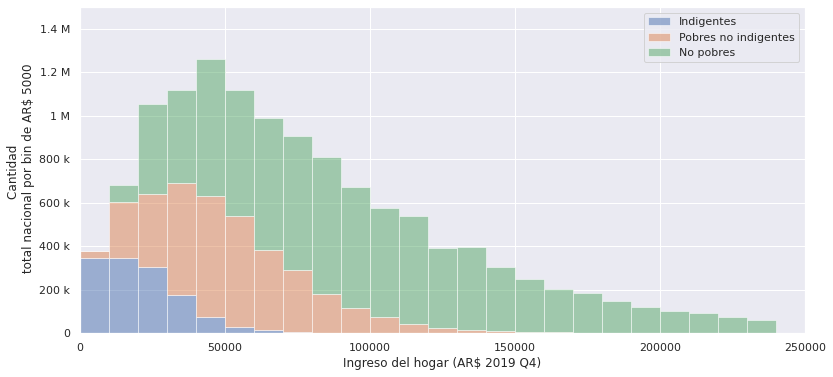

In [31]:
import numpy as np
from matplotlib.ticker import EngFormatter

plot_dist(data[['HOGAR_REF_ID', 'Q', 'P47T_hogar', 'Pobreza', 'Indigencia']].drop_duplicates(), variable = 'P47T_hogar', xmin = 0, 
          titulo = 'Ingreso del hogar (AR$ 2019 Q4)')

# plot_dist(data.loc[(data['P03'] > 24) & (data['P03'] > 34)], variable = 'P47T_persona', xmin = 0, 
#           titulo = 'Ingreso del hogar (AR$ 2019 Q4)')

## Lineas de Pobreza e indigencia

#### Total Pais

In [32]:
from IPython.display import display, HTML
# def pretty_print(df):
#     return display(HTML(df.to_html().replace("\\n","<br>")))

def pd_centered(df):
    return df.style.set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]},
        {"selector": "td", "props": [("text-align", "center")]}])

In [33]:
# tabla_semestral = pd.read_csv('./../data/info/tabla_semestral.csv', index_col=0, header = [0, 1])
# table = tabla_semestral.drop(['PERSONA_REF_ID', 'CBA','CBT'], axis = 1)
# table = table.iloc[:, table.columns.get_level_values(1) != 'sum']
# table.index = pd.to_datetime(table.index, infer_datetime_format=True)
# table.index = table.index.to_period("6M")

# table[('Pobreza', 'mean')] = 100*table[('Pobreza', 'mean')]
# table[('Indigencia', 'mean')] = 100*table[('Indigencia', 'mean')]

# table.columns = pd.Index([('Ingreso Persona', 'promedio'), ('Ingreso Persona', 'mediana'),
#                 ('Ingreso Hogar', 'promedio'), ('Ingreso Hogar', 'mediana'),
#                 ('Ingreso Hogar sobre linea de pobreza', 'promedio'), ('Ingreso Hogar sobre linea de pobreza', 'mediana'),
#                 ('Pobreza (personas)', '%'), ('Indigencia (personas)', '%')])

# pd_centered(table.round({('Ingreso Persona', 'promedio'): -2, ('Ingreso Persona', 'mediana'): -2,
#                 ('Ingreso Hogar', 'promedio'): -2, ('Ingreso Hogar', 'mediana'): -2,
#                 ('Ingreso Hogar sobre linea de pobreza', 'promedio'): -2, ('Ingreso Hogar sobre linea de pobreza', 'mediana'): -2,
#                 ('Pobreza (personas)', '%'): 1, ('Indigencia (personas)', '%'): 1}))

\* En este cuadro, el calculo de ingresos medios incluye a toda la poblacion, tambien menores e inactivos.



## 'Linea de Pobreza'

Para este paso, se aplican la regla sugerida por INDEC de pobreza monetaria. 

**De donde sale***

Involucra usar un numero cercano a 2.5 que viene de la encuesta de Gastos de Hogares (ENGHO).
Es decir, esta es una linea de ~2.5 Canastas alimentarias. Este es un punto crucial ya que afecta el numerito final de resultado que vamos a tener. Los valores precisos van a estar en el apendix pero seria bueno tambien un calculo menos vulnerable al control. 
La canasta alimentaria al poder ser biologicamente establecida y con algunos estimadores economicos sencillos (cuanto cuesta comer lo necesario) es mas transparente. Tambien se presta a ser comparada en reglas internacionales, es decir sugerencias de valores PPP que representan un nivel medido de alimentacion.

***Como se calcula***
 - Se usan los 10 trimestres disponibles para entrenar. 
 - Los resultados del algoritmo de prediccion son ingresos de personas y hogares.
 - Nos permite predecir un output complicado, como puede ser una condicion en la ecuacion del hogar.
 - Aprovechamos que los ponderamientos se pueden lograr sampleando al azar de una muestra comprensiva (Censo 2010).
 - Se usan las proyecciones poblacionales por departamento (INDEC)
 - Todos los valores en pesos de 2019-Q4. Conviene deflactar mensualmente. 
 - Se usa promedio simple. En alta inflacion da cierto bias. Aunque igualmente, tambien nosotros perdemos idea de cuanto valia el peso en ese momento.
 
 

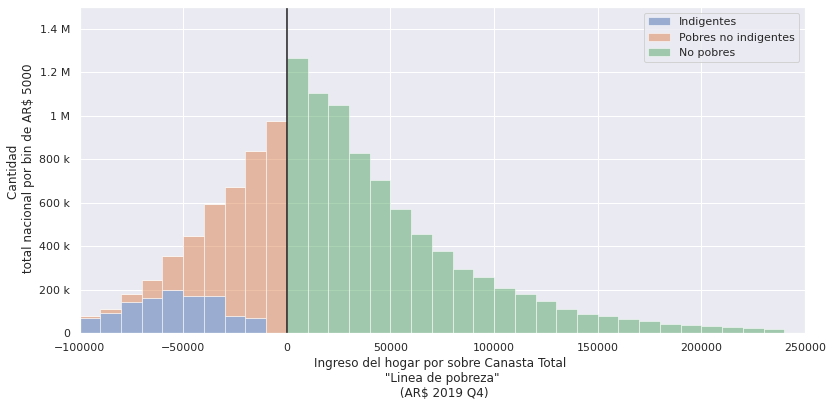

In [34]:
plot_dist(data, variable = 'gap_pobreza', xmin = -100000,
          titulo = 'Ingreso del hogar por sobre Canasta Total \n "Linea de pobreza" \n (AR$ 2019 Q4)')

***La linea de la canasta alimentaria***

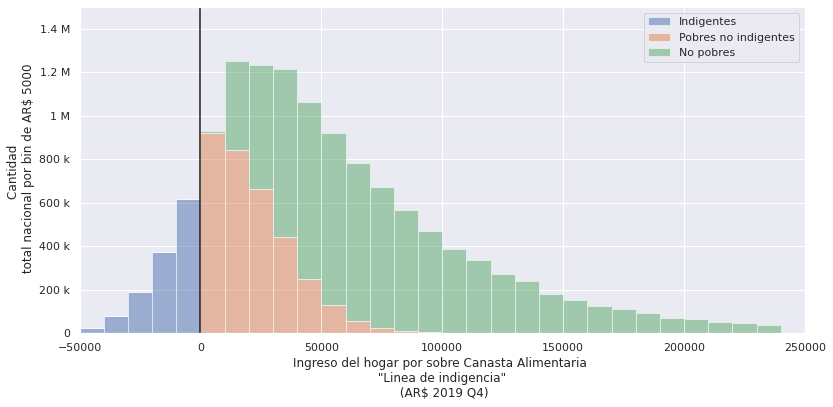

In [35]:
plot_dist(data, variable = 'gap_indigencia', xmin = -50000,
          titulo = 'Ingreso del hogar por sobre Canasta Alimentaria \n "Linea de indigencia" \n (AR$ 2019 Q4)')



Una vez que se hacen predicciones de ingresos y se calcula la 'Canasta Basica Alimentaria' de las personas de los hogares, calculamos la ecuacion en cada uno de los hogares y agregamos los resultados.

Esto nos deja ver una estructura detallada de la población de hogares que no llega pagar la canasta básica alimentaria de sus integrantes.

#### Canastas alimentaria y total, vs ingreso medio individual y de hogar.

Precios constantes de 2019-Q4. Los costos de canastas definidos post intervencion de 2016 se extienden hacia atras hasta 2003 para todos los calculos de pobreza.

In [36]:
# tabla_semestral_AGLOS = pd.read_csv('./../data/info/tabla_semestral_AGLOS.csv', index_col=0, header = [0, 1])
# table = tabla_semestral_AGLOS.drop(['PERSONA_REF_ID', 'CBA','CBT'], axis = 1)
# table = table.iloc[:, table.columns.get_level_values(1) != 'sum']
# table.index = pd.to_datetime(table.index, infer_datetime_format=True)
# table.index = table.index.to_period("6M")

# table[('Pobreza', 'mean')] = 100*table[('Pobreza', 'mean')]
# table[('Indigencia', 'mean')] = 100*table[('Indigencia', 'mean')]

# table.columns = pd.Index([('Ingreso Persona', 'promedio'), ('Ingreso Persona', 'mediana'),
#                 ('Ingreso Hogar', 'promedio'), ('Ingreso Hogar', 'mediana'),
#                 ('Ingreso Hogar sobre linea de pobreza', 'promedio'), ('Ingreso Hogar sobre linea de pobreza', 'mediana'),
#                 ('Pobreza (personas)', '%'), ('Indigencia (personas)', '%')])

# pd_centered(table.round({('Ingreso Persona', 'promedio'): -2, ('Ingreso Persona', 'mediana'): -2,
#                 ('Ingreso Hogar', 'promedio'): -2, ('Ingreso Hogar', 'mediana'): -2,
#                 ('Ingreso Hogar sobre linea de pobreza', 'promedio'): -2, ('Ingreso Hogar sobre linea de pobreza', 'mediana'): -2,
#                 ('Pobreza (personas)', '%'): 1, ('Indigencia (personas)', '%'): 1}))

In [299]:
from datetime import datetime as dt

df = pd.read_csv('./../../encuestador-de-hogares/data/info/indice_precios_d.csv', index_col=0)
ix = df.loc[dt.today().strftime(format = '%Y-%m-%d')]/df.loc['2016-01-01']
ix.values[0]


5.69043423742186

In [300]:
## Cargar:
grouper = ['Q', 'AGLO_si']; base_str = 'M24'
infoP = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

grouper = ['Q', 'AGLO_si']; base_str = 'H'
infoH = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()
infoH = infoH.loc[~infoH.observable.str.contains('gap_')]

grouper = ['Q', 'AGLO_si']; base_str = 'Hp'
infoHp = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()
infoHp = infoHp.loc[infoHp.observable.str.contains('gap_pobreza')]

grouper = ['Q', 'AGLO_si']; base_str = 'Hi'
infoHi = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()
infoHi = infoHi.loc[infoHi.observable.str.contains('gap_indigencia')]

info = pd.concat([infoP, infoH, infoHp, infoHi])
info['Q'] = pd.to_datetime(info['Q'])

# Mean pobreza, indigencia
info_ = info.loc[(info.AGLO_si == True) & (info.sintetico == 'mean') & (~info.observable.isin(['Pobreza', 'Indigencia']))].set_index(['observable', 'sintetico', 'base'] + grouper)['valor'].unstack(-2).T
df = info_

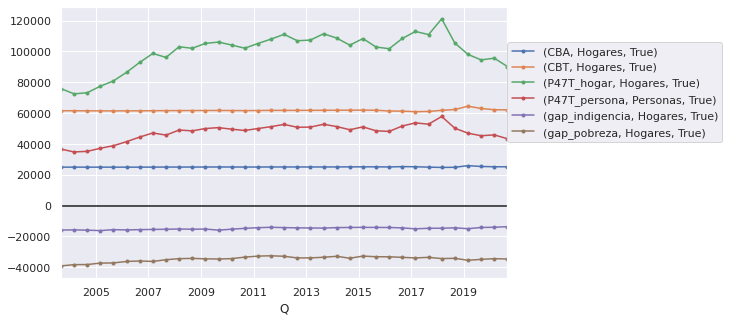

In [302]:
# Rolling 4 trimestres de interpolado
df = df.resample('Q').mean().interpolate()

show = df.groupby(pd.Grouper(level = 0, freq = '6M')).mean()
show.columns = show.columns.droplevel(1)
# show.index = range(startyr, endyr)
# show.columns = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in show.columns])
# 100*show.T.loc[['Indigencia', 'Pobreza']].round(3)

fig, ax = plt.subplots(figsize = (8, 5))
(ix.values[0]*show).plot(ax = ax, marker = '.')
ax.axhline(0, c = 'k')
ax.legend(loc = (1, .5))
plt.show()

## Variacion regional

In [39]:
# Datos Geograficos!
####

import geopandas as gpd


## Shapefiles de provincias
ref_provs = gpd.read_file('./../../IGN_INDEC_georef/IGN_shp/Provincia/')

### Shapefiles de Fracciones censales y departamentos
frac_gdf = gpd.read_file('./../../IGN_INDEC_georef/censos_shp_CONICET_dissolved/fracs_2010.shp')
dptos_gdf = gpd.read_file('./../../IGN_INDEC_georef/censos_shp_CONICET_dissolved/dptos_2010.shp')

# frac_gdf['personas'] = pd.to_numeric(frac_gdf['personas'])
# dptos_gdf['personas'] = pd.to_numeric(dptos_gdf['personas'])

fancy_crs = {u'lat_0': -35,
 u'lon_0': -65,
 u'no_defs': True,
 u'proj': u'ortho',
 u'units': u'm',
 u'x_0': -65,
 u'y_0': -35,
 u'a' : 6371000, 
 u'b' : 6371000}

# dptos_gdf = dptos_gdf.to_crs(fancy_crs)
# crs = {'init': 'epsg:4326'} #latlong
#  = ...to_crs({'init': 'epsg:3395'}) # en metrico

In [40]:
radio_ref = pd.read_csv('./../data/info/radio_ref.csv')

aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]
dpto_region = pd.read_csv('./../data/info/DPTO_PROV_Region.csv')

radio_ref = radio_ref.merge(aglo_labels).merge(dpto_region)
radio_ref = radio_ref[['RADIO_REF_ID', 'NOMDPTO','NOMPROV', 'AGLOMERADO', 'NOMAGLO', 'Region', 'IDPROV', 'IDDPTO', 'IDFRAC']]

radio_ref['PROV_'] = radio_ref.IDPROV.astype(str).str.zfill(2)
radio_ref['DEPTO_'] = radio_ref.IDDPTO.astype(str).str.zfill(3)
radio_ref['FRACC_'] = radio_ref.IDFRAC.astype(str).str.zfill(2)

In [41]:

# data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2020.csv')
data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2019-2020.csv')

data['Grupo Etario'] = pd.cut(data.P03, np.arange(-1, 80, 3))#.round(-1) ## Customizar grupo etario

data = data.merge(radio_ref[['RADIO_REF_ID', 'PROV_','DEPTO_','FRACC_']], how = 'left')

In [42]:
### Matriz que da origen a las barritas de abajo.

data_hogares = data.groupby('HOGAR_REF_ID').first()
data_hogares = data_hogares.merge(radio_ref[['RADIO_REF_ID', 'Region', 'NOMPROV', 'NOMAGLO']].drop_duplicates())
data_hogares['Region'] = data_hogares['Region'].replace('Gran Buenos Aires', 'AMBA')
data_hogares['pctil'], bins_hogares = pd.qcut(data_hogares.P47T_hogar, 15, retbins=True)

df = data_hogares.groupby(['Region', 'pctil'])[['P47T_hogar']].count().unstack()
# df = df.div(df.sum(1), 0)#.round(3)

df_CABA = data_hogares.groupby(['NOMPROV', 'pctil'])[['P47T_hogar']].count().unstack().loc[['Ciudad Autónoma de Buenos Aires']]
# df_CABA = df_CABA.div(df_CABA.sum(1), 0)

df_GBA = data_hogares.groupby(['NOMAGLO', 'pctil'])[['P47T_hogar']].count().unstack().loc[['GBA']]
# df_GBA = df_GBA.div(df_GBA.sum(1), 0)

df = pd.concat([df_CABA, df_GBA, df])

df = df.reindex(['Noroeste', 'Noreste','Ciudad Autónoma de Buenos Aires', 'GBA', 'Cuyo', 'Pampeana', 'Patagónica'])

In [43]:
tot_reg = data_hogares.groupby('Region').count().iloc[:, 0]/frac/nfiles_in_data
totprovs = data_hogares.groupby('NOMPROV').count().iloc[:, 0]/frac/nfiles_in_data
totaglos = data_hogares.groupby('NOMAGLO').count().iloc[:, 0]/frac/nfiles_in_data

tot_hogares = pd.concat([tot_reg, totprovs, totaglos])

In [44]:

# data['link'] = data['DPTO'].astype(str).str.zfill(5)

# pob_dpto = data.groupby('link')[['Pobreza']].mean().reset_index()


El cuadro de deciles de ingreso muestra valores nacionales. Sin embargo ¿Cómo se distribuyen las poblaciones regionales entre estos grupos de ingreso?


In [45]:
## Mapa de pobreza por provincias
## Tomar valores de pobreza
pob_prov = data.groupby(['PROV_'])[['Pobreza']].mean().reset_index()

## Unir info geografica
pobreza_gdf = gpd.GeoDataFrame(pob_prov.merge(ref_provs[['IN1', 'NAM', 'geometry']], left_on = 'PROV_', right_on = 'IN1'))

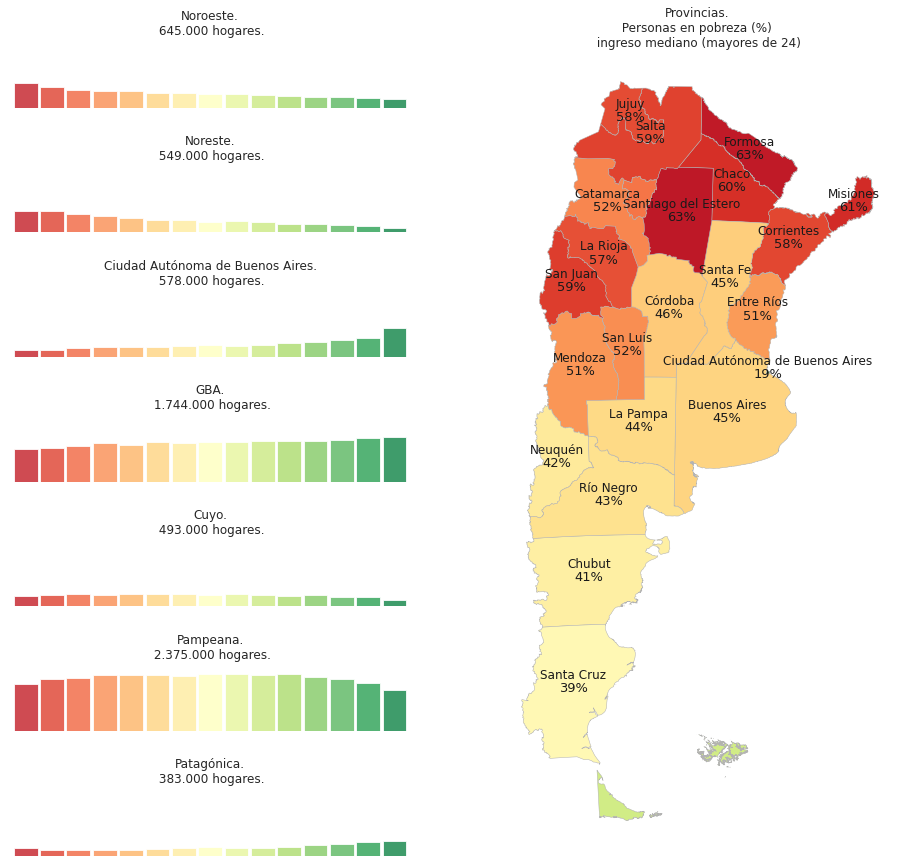

In [46]:
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, figsize = (16, 15))
# plt.title('Provincias.\n Personas en pobreza (%) \n ingreso mediano (mayores de 24)')
# sns.set_style("whitegrid")

spec = gridspec.GridSpec(ncols=2, nrows=len(df), figure=fig)

# ##########################################


for i in range(len(df)):
#     ax = axs[i]
    ax = fig.add_subplot(spec[i, 0])
    (df.iloc[i]/nfiles_in_data).plot(kind = 'bar', ax = ax, width = .9, color = sns.color_palette("RdYlGn", 15), alpha = .8)# colormap = 'RdYlGn')
    lugar = df.index[i]
    ax.set_title(lugar + '.\n '+str('{:,}'.format(int(np.round(tot_hogares.loc[lugar], -3))).replace(',', '.'))+' hogares.')
    ax.set_xlabel('Percentiles nacionales de ingreso', fontsize = 10)
    ax.set_ylim(0, 4000)
    ax.axis('off')
    plt.subplots_adjust(hspace = 0.85)
    
# ##########################################

    # MAPA PROVINCIAS

# Elegir crs
# crs = {'init': 'epsg:3395'}
crs = fancy_crs
pobreza_gdf_crs = pobreza_gdf.to_crs(crs)

ax = fig.add_subplot(spec[:, 1])

# Carteles
for i, row in pobreza_gdf_crs.loc[~pobreza_gdf.NAM.isin(['Tucumán', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur'])].iterrows(): # Sacamos esta provs para que no se superpongan los cartelitos
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    
#     ingreso_mediano = '$'+str(int(myround(row.P47T_persona,500)))
    pobreza = str(int(round(100*row.Pobreza)))+'%'

    ax.text(x, y + 40000, row.NAM, fontsize=12, color = '.1', horizontalalignment = 'center')
    ax.text(x, y - 25000, pobreza, fontsize=13, color = '.1', horizontalalignment = 'center')
#     ax.text(x, y - 70000, ingreso_mediano, fontsize=11, color = '.1', horizontalalignment = 'center')


# Provincias
# provs_gdf.plot(column = 'P47T_persona', ax = ax, vmin = 10000, vmax = 35000, cmap = 'RdYlGn')
pobreza_gdf_crs.plot(column = 'Pobreza', ax = ax, vmin = .1, vmax = .66, cmap = 'RdYlGn_r', edgecolor = '.7', lw = 0.5)


# # Encuadre ARG
if crs == {'init': 'epsg:3395'}:
    ax.set_xlim(-8300000, -5750000)
    ax.set_ylim(-7450000, -2400000)
elif crs == fancy_crs:
    ax.set_xlim(-.75e6, 1.25e6)
    ax.set_ylim(-2.3e6, 1.6e6)

# ax.set_xlabel('A')
ax.axis('off')

plt.title('Provincias.\n Personas en pobreza (%) \n ingreso mediano (mayores de 24)')
plt.show()


# fig.colorbar(im, ax=ax, orientation="horizontal")
# divider = make_axes_locatable(ax)
# cax = divider.new_vertical(size="5%", pad=0.7, pack_start=True)
# fig.add_axes(cax)
# fig.colorbar(im, cax=cax, orientation="horizontal")

# El error en ingreso medio por provincia esta en los 500 a 1000 pe
# En la cifra de pobreza el error es de 1%

## Tamaño de la vivienda. Hacinamiento.

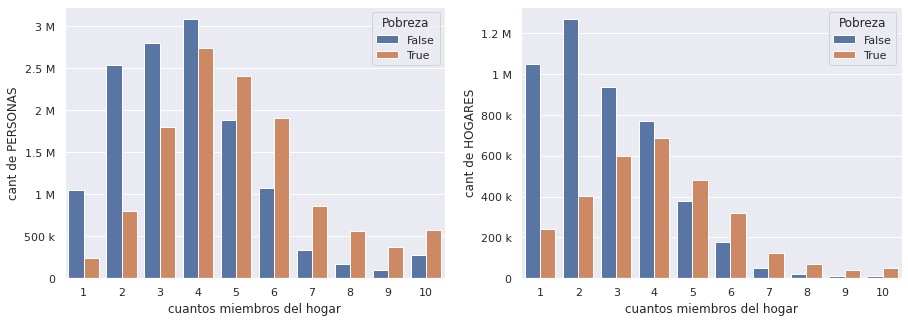

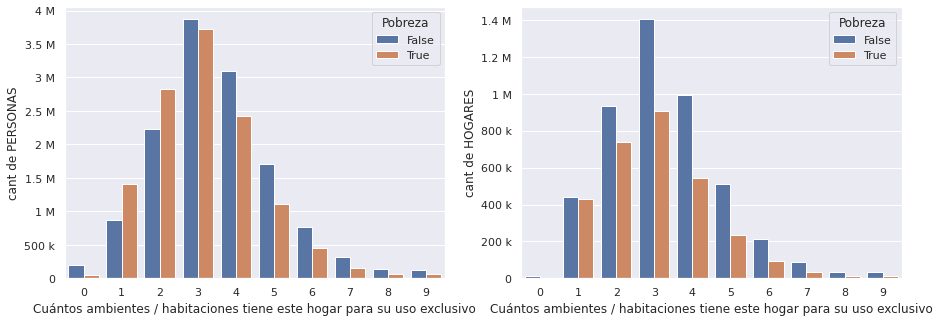

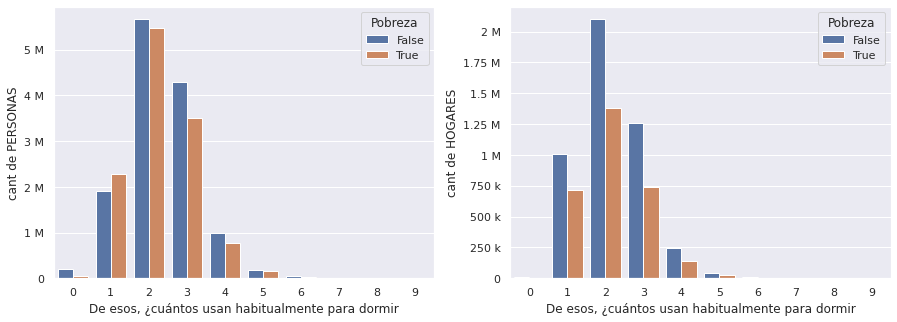

In [47]:

# data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2020.csv')#.reset_index().rename(columns = {'index': 'PERSONA_REF_ID'})
data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2019-2020.csv')

import numpy as np
from matplotlib.ticker import EngFormatter
# cat_cols = ['V01', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10',
#        'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'PROP',
#        'P02', 'P05', 'P07', 'P08', 'P09', 'P10', 'CAT_OCUP',
#        'CAT_INAC', 'CH07', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59',
#        'PP07H', 'PP07I', 'PP07J', 'PP07K',
#        'AGLOMERADO', 'CONDACT', 'Grupo Etario'] # IX_TOT
# value_cols = 'P47T' #?

data['IX_TOT'] = np.clip(data.IX_TOT, 0, 10)
data['H15'] = np.clip(data.H15, 0, 9)

cat_cols = ['IX_TOT', 'H16', 'H15']

vn = pd.read_csv('./../data/info/VARIABLE_NAMES.csv')
# vn['Pregunta'] = vn['Pregunta'].str.strip()#.str.replace("'", "") Don't run
# data = data.reset_index().rename(columns = {'index': 'PERSONA_REF_ID'}) # parche porque no esta la columna

for cat in cat_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
    info = data.groupby([cat, 'Pobreza'])[['PERSONA_REF_ID', 'HOGAR_REF_ID']].nunique()
    info_pct = (100*(info.unstack()/info.unstack().sum()).stack())
    
    sns.barplot(x=cat, y="PERSONA_REF_ID", hue="Pobreza", data=(info/frac/nfiles_in_data).reset_index(), ax = ax1)
    xlab = ''
    try:
        xlab = vn.loc[vn.Censo == cat]['Pregunta'].values[0]
    except:
        try:
            xlab = vn.loc[vn.EPH == cat]['Pregunta'].values[0]
        except:
            pass
    ax1.set(xlabel= xlab, ylabel = 'cant de PERSONAS')
    ax1.yaxis.set_major_formatter(EngFormatter())
    sns.barplot(x=cat, y="HOGAR_REF_ID", hue="Pobreza", data=(info/frac/nfiles_in_data).reset_index(), ax = ax2)
    ax2.set(xlabel= xlab, ylabel = 'cant de HOGARES')
    ax2.yaxis.set_major_formatter(EngFormatter())
    plt.show()

## Pobreza por grupo etario

In [48]:
# pd.cut(data.P03)
nfiles_in_data = 4

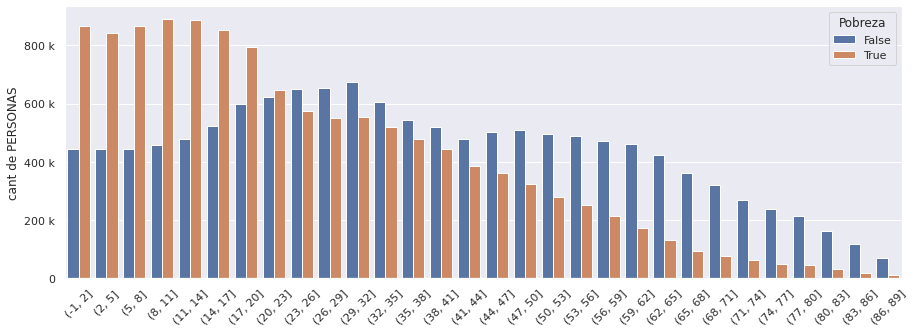

In [49]:
data['Grupo Etario'] = pd.cut(data.P03, np.arange(-1, 90, 3))

cat = 'Grupo Etario'

vn = pd.read_csv('./../data/info/VARIABLE_NAMES.csv')
# vn['Pregunta'] = vn['Pregunta'].str.strip()#.str.replace("'", "") Don't run

fig, ax = plt.subplots(1, figsize = (15, 5))
info = data.groupby([cat, 'Pobreza'])[['PERSONA_REF_ID']].nunique()
sns.barplot(x=cat, y="PERSONA_REF_ID", hue="Pobreza", data=(info/frac/nfiles_in_data).reset_index(), ax = ax)
xlab = ''
ax.tick_params(axis='x', rotation=45)
ax.yaxis.set_major_formatter(EngFormatter())
ax.set(xlabel= xlab, ylabel = 'cant de PERSONAS')
plt.show()

In [50]:
# ## Upper tail

# data['income_bin'] = pd.cut(np.log10(data['P47T_persona']).replace(-np.inf, 1), 100)

# fig, ax = plt.subplots(1, figsize = (5, 6))

# pdf_info = data.groupby('income_bin')['PERSONA_REF_ID'].count().reset_index()
# pdf_info['PERSONA_REF_ID'] = pdf_info['PERSONA_REF_ID']/frac/nfiles_in_data

# pdf_info['pdf'] = pdf_info['PERSONA_REF_ID']/pdf_info['PERSONA_REF_ID'].sum()
# pdf_info['cdf'] = pdf_info['pdf'].cumsum()

# np.log10(1 - pdf_info.iloc[60:85].set_index('income_bin')[['cdf']]).reset_index().plot(x = 'income_bin', y = 'cdf', marker = '.', ax = ax)
# ax.tick_params(axis='x', rotation=45)

# pdf_info.tail(20)

## Ingresos, pobreza e indigencia por niveles educativos

En este cuadro, los ingresos medios, porcentaje de pobreza e indigencia segun nivel educativo.

In [51]:
cuadro = pd.read_csv('./../data/cuadros/cuadro3_'+str(frac)+'_ARG', index_col=[0, 1], header = [0, 1, 2])

cuadro = cuadro.loc['2003':].drop(('P47T_persona', 'mean', 'Mayores de 24'), axis = 1)
cuadro.columns = ['Indigencia (%)', 'Ingresos (mediana)', 'Pobreza (%)']
cuadro = cuadro.unstack().mean().unstack().T

cuadro = cuadro[['Ingresos (mediana)', 'Pobreza (%)', 'Indigencia (%)']]
cuadro = cuadro.loc[[2, 20, 21, 40, 41, 60, 61, 70, 71, 80, 81]]

data_sel = data[['P03','P0910']]
counts = data_sel.loc[data_sel.P03 > 24]['P0910'].value_counts()
counts_pct = (100*counts.loc[[2, 20, 21, 40, 41, 60, 61, 70, 71, 80, 81]]/counts.sum()).round(1)

cuadro = pd.concat([cuadro, counts_pct], axis = 1)
cuadro = cuadro.rename(columns = {'P0910':'Poblacion (%)'})
cuadro.index = ['No asistió', 'Primaria', 'P. completa', 'Secundaria','S. completa', 'Terciario', 'T. completo', 
             'Universidad', 'U. completa', 'Postgrado', 'P. completo']

cuadro = cuadro.round({'Ingresos (mediana)': -2, 'Pobreza (%)': 1, 'Indigencia (%)': 1, 'Poblacion (%)': 1})
cuadro.style.bar(subset = ['Poblacion (%)'], vmin = 0).format("{:.1f}")

,Ingresos (mediana),Pobreza (%),Indigencia (%),Poblacion (%)
No asistió,3400.0,52.8,20.1,2.1
Primaria,3700.0,51.5,19.3,13.3
P. completa,4200.0,46.4,15.3,27.5
Secundaria,5300.0,44.3,13.7,13.8
S. completa,7000.0,30.7,7.7,19.6
Terciario,7300.0,27.3,7.0,2.9
T. completo,9100.0,17.0,3.1,6.4
Universidad,8500.0,18.5,4.1,5.9
U. completa,13300.0,8.7,1.7,6.9
Postgrado,12700.0,8.3,2.0,0.3


*Mayores de 24 años

## Dependencia geografica
### Porcentaje de personas en pobreza por departamento.

In [52]:
import geopandas as gpd
frac = 0.02

In [53]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]

radio_ref = pd.read_csv('./../data/info/radio_ref.csv')
# radio_ref[['PROV','NOMPROV','DPTO', 'NOMDPTO']].drop_duplicates().to_csv('./data/DPTO_PROV.csv', index = False)
dpto_region = pd.read_csv('./../data/info/DPTO_PROV_Region.csv')
radio_ref = radio_ref.merge(dpto_region)
radio_ref = radio_ref[['RADIO_REF_ID', 'NOMDPTO','NOMPROV', 'AGLOMERADO', 'Region', 'IDPROV', 'IDDPTO', 'IDFRAC']].drop_duplicates().merge(aglo_labels)

radio_ref['PROV_'] = radio_ref.IDPROV.astype(str).str.zfill(2)
radio_ref['DEPTO_'] = radio_ref.IDDPTO.astype(str).str.zfill(3)
radio_ref['FRACC_'] = radio_ref.IDFRAC.astype(str).str.zfill(2)


# data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2020.csv')
data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2019-2020.csv')

data = data.merge(radio_ref[['RADIO_REF_ID', 'PROV_','DEPTO_','FRACC_']], how = 'left')

In [54]:
### Guardar la pobreza por fracciones para otros usos. (eg mapa interactivo)
import os
if not os.path.exists('./../geo'):
    os.makedirs('./../geo')

pob_frac = data.groupby(['PROV_', 'DEPTO_', 'FRACC_'])[['Pobreza']].mean().reset_index()
pobreza_gdf = gpd.GeoDataFrame(pob_frac.merge(frac_gdf))

pobreza_gdf.to_crs({'init': 'epsg:4326'}).to_file('./../geo/pobreza_frac')

In [55]:
## Data que tenga las keys de radio a fracs, de radio a dpto IGN,

## Data que tenga shapes e los radios disueltos en fracciones o en deptos IGN

In [56]:
## Tomar valores de pobreza
pob_frac = data.loc[data.PROV.isin([2, 6])].groupby(['PROV_', 'DEPTO_', 'FRACC_'])[['Pobreza']].mean().reset_index()
# pob_frac = data.loc[data.AGLOMERADO.isin([32])].groupby(['IDFRAC','DPTO'])[['Pobreza']].mean().reset_index()
# pob_frac = data.loc[data.PROV.isin([82])].groupby(['IDFRAC','DPTO'])[['Pobreza']].mean().reset_index()
# pob_frac = data.loc[data.AGLOMERADO.isin([25])].groupby(['IDFRAC','DPTO'])[['Pobreza']].mean().reset_index()

## Unir info geografica
pobreza_gdf = gpd.GeoDataFrame(pob_frac.merge(frac_gdf))

# Fill na with median. Esp for areas of little pop.
# # data.groupby('DPTO').count().iloc[:, 0].sort_values(ascending = False).head(10)
# pobreza_gdf.loc[pobreza_gdf.personas < 3000, 'Pobreza'] = np.nan
# pobreza_gdf = pobreza_gdf.fillna(pob_dpto_gdf.Pobreza.median())

gdf = pobreza_gdf#.plot(column = 'Pobreza')

In [57]:
from shapely.geometry import box

In [58]:
fracs_GBA_gdf = gpd.GeoDataFrame(radio_ref.loc[radio_ref.AGLOMERADO == 33][['PROV_','DEPTO_']].drop_duplicates().merge(frac_gdf[['PROV_','DEPTO_', 'FRACC_', 'geometry']]))

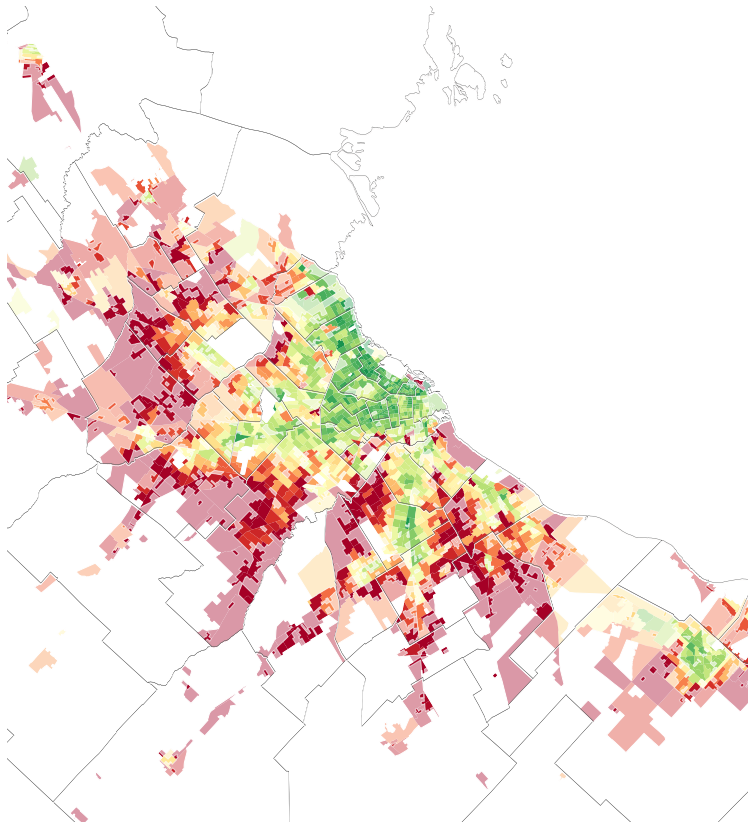

In [59]:
fig, ax = plt.subplots(1, figsize = (15, 15))

## Bordes de Departamento (doble linea)
bordes_dptos = dptos_gdf.loc[dptos_gdf.PROV_.isin(['02', '06'])].to_crs({'init': 'epsg:3395'})
bordes_dptos.translate(yoff = 220, xoff = 30).plot(color = 'None', edgecolor = '.4', lw = .4, ax = ax, zorder = 10)
bordes_dptos.translate(yoff = 0, xoff = 0).plot(color = 'None', edgecolor = 'w', lw = .4, ax = ax, zorder = 10)

gdf.fillna(0).to_crs({'init': 'epsg:3395'}).plot(column = 'Pobreza', ax = ax, vmin = 0, vmax = .6, cmap = 'RdYlGn_r', lw = 0)

# plot bounds
custom_bounds = fracs_GBA_gdf.to_crs({'init': 'epsg:3395'}).total_bounds
x0, y0, x1, y1 = box(*custom_bounds).buffer(-15000).bounds 
# minx, miny, maxx, maxy

ax.set_xlim(x0, x1); ax.set_ylim(y0, y1)
ax.axis('off')

ejido90 = gpd.read_file('./../../ejidos_ARG/geo/ejido90')
ejido90.to_crs({'init': 'epsg:3395'}).plot(color = 'w', ax = ax)

ejido60 = gpd.read_file('./../../ejidos_ARG/geo/ejido60')
ejido60.to_crs({'init': 'epsg:3395'}).plot(color = 'w', alpha = .6, ax = ax)

plt.savefig("./mapa_portada.png")
plt.show()

In [60]:
## Tomar valores de pobreza
pob_dpto = data.groupby(['PROV_', 'DEPTO_'])[['Pobreza']].mean().reset_index()

## Unir info geografica
pobreza_dpto_gdf = gpd.GeoDataFrame(pob_dpto.merge(dptos_gdf))
gdf = pobreza_dpto_gdf

In [61]:
### Guardar la pobreza por departamentos para otros usos. (eg mapa interactivo)
pobreza_dpto_gdf.to_crs({'init': 'epsg:4326'}).to_file('./../geo/pobreza_dpto')

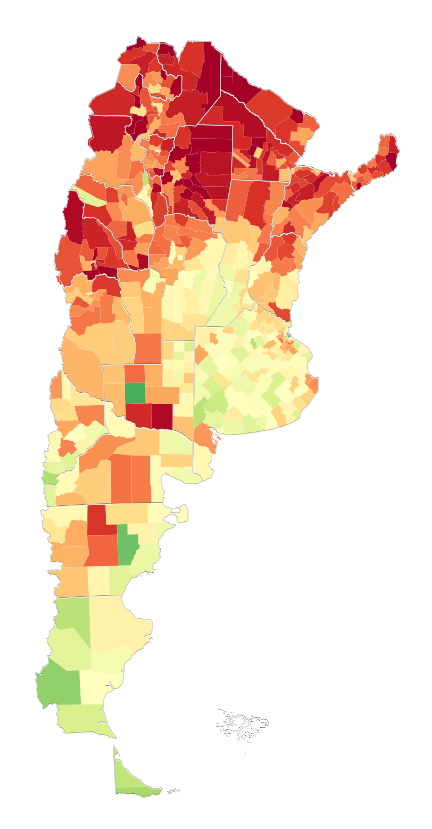

In [62]:

# Elegir crs
# crs = {'init': 'epsg:3395'}
crs = fancy_crs

fig, ax = plt.subplots(1, figsize = (8, 15))
## Pobreza deptos
gdf.fillna(0).to_crs(crs).plot(column = 'Pobreza', ax = ax, vmin = .1, vmax = .75, cmap = 'RdYlGn_r', lw = 0)

# Bordes provincias (doble linea)
ref_provs.to_crs(crs).translate(yoff = 2200, xoff = 300).plot(color = 'None', edgecolor = '.4', lw = .4, ax = ax, zorder = 10)
ref_provs.to_crs(crs).translate().plot(color = 'None', edgecolor = 'w', lw = .4, ax = ax, zorder = 10)

# # Encuadre ARG
if crs == {'init': 'epsg:3395'}:
    ax.set_xlim(-8300000, -5750000)
    ax.set_ylim(-7450000, -2400000)
elif crs == fancy_crs:
    ax.set_xlim(-.75e6, 1.25e6)
    ax.set_ylim(-2.3e6, 1.6e6)

plt.axis('off')
plt.show()

### Porcentaje de personas en pobreza por fraccion censal.
#### Ejido Urbano AMBA

# Dependencia Temporal

In [63]:
# df = pd.read_csv('./../data/cuadros/cuadro_AGLO_si_Q_pct', index_col=[0, 1], header = [0, 1]).unstack(0, 1)
# df.index = pd.DatetimeIndex(df.index, freq = 'Q')

# df_ = df[['Indigencia', 'Pobreza']].groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T
# df_.index = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in df_.index])
# show = df_.copy()
# show.columns = show.columns.to_period("6M")
# show

### Porcentajes, provincias. (2019)

In [337]:
from datetime import datetime as dt

df = pd.read_csv('./../../encuestador-de-hogares/data/info/indice_precios_d.csv', index_col=0)
ix = df.loc[dt.today().strftime(format = '%Y-%m-%d')]/df.loc['2016-01-01']
ix.values[0]

## Cargar:
grouper = ['Q', 'PROV']; base_str = 'P'
infoP = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'PROV']; base_str = 'H'
infoH = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Pobreza', 'Indigencia']) & (info.sintetico == 'mean')]
info = info.set_index(['observable', 'base', 'PROV', 'Q'])['valor']
info = info.unstack().iloc[:, -4:].mean(1)
show = 100*info.unstack().T.round(3)

display(show.reindex(show.sum(1).sort_values(ascending = False).index))


observable Indigencia          Pobreza         
base          Hogares Personas Hogares Personas
PROV                                           
34               20.1     25.5    52.3     63.2
54               19.4     25.8    51.5     62.9
86               19.6     24.5    51.1     61.3
22               19.3     24.4    51.3     61.1
18               17.4     23.0    47.8     58.7
66               17.5     22.0    47.8     57.6
70               14.9     18.6    50.6     60.4
38               16.4     19.5    46.9     56.2
46               12.7     16.0    47.4     56.7
90               15.1     18.2    44.7     53.3
10               13.9     17.5    42.3     51.6
30               11.8     16.1    40.3     51.3
74               10.3     13.4    42.2     52.5
50               10.6     13.1    42.0     51.8
82               10.3     14.1    35.4     45.6
6                 9.8     13.0    35.4     44.9
14                9.7     13.1    35.1     45.2
42                9.0     12.3    33.6     44.3
62                9.2     11.4    35.5     43.1
58                9.3     11.0    34.8     41.8
26                8.1     10.0    34.1     42.2
78                6.8      7.9    32.9     39.5
94                4.8      5.4    27.0     33.4
2                 4.0      4.8    14.3     18.5

In [65]:
# # Niveles
# show = df.groupby(pd.Grouper(level = 0, freq = 'Y')).mean()
# show.columns = show.columns.droplevel(1)
# show.index = range(2007, 2019)

In [366]:
from datetime import datetime as dt

df = pd.read_csv('./../../encuestador-de-hogares/data/info/indice_precios_d.csv', index_col=0)
ix = df.loc[dt.today().strftime(format = '%Y-%m-%d')]/df.loc['2016-01-01']
ix.values[0]

## Cargar:
grouper = ['Q', 'PROV']; base_str = 'P'
infoP = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'PROV']; base_str = 'H'
infoH = pd.read_json('./result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info['Q'] = pd.to_datetime(info['Q'])

info = info.loc[info.observable.isin(['Pobreza', 'Indigencia']) & (info.sintetico == 'mean')]
info = info.set_index(['PROV', 'base', 'observable', 'Q'])['valor']
info = info.unstack()

info = info.T.groupby(pd.Grouper(level = 0, freq = 'Y')).mean().T
info.columns = range(startyr, endyr)

# display(show.reindex(show.sum(1).sort_values(ascending = False).index))
100*info.round(3)

2003  2004  2005  2006  2007  2008  2009  2010  \
PROV base     observable                                                   
2    Hogares  Indigencia   8.7   7.4   5.7   4.5   3.5   3.2   3.0   3.1   
              Pobreza     26.3  25.3  20.5  17.5  13.9  13.9  12.8  12.4   
     Personas Indigencia  10.6  10.5   8.2   6.1   4.5   4.2   4.4   4.1   
              Pobreza     30.6  31.3  26.2  22.4  18.3  17.8  17.2  16.2   
6    Hogares  Indigencia  22.2  20.1  16.2  12.7  10.4   9.1   9.1   7.9   
              Pobreza     54.2  52.9  47.5  40.5  35.6  33.6  32.9  32.1   
     Personas Indigencia  28.1  26.0  21.1  16.9  13.5  12.0  12.3  10.8   
              Pobreza     61.8  61.3  56.1  49.2  44.2  41.2  40.9  40.1   
10   Hogares  Indigencia  32.4  28.8  28.2  22.9  19.8  16.9  17.8  16.1   
              Pobreza     62.8  60.2  58.6  52.3  49.4  43.8  43.6  42.3   
     Personas Indigencia  39.4  34.5  35.3  28.9  24.6  21.1  24.1  19.8   
              Pobreza     71.0  67.7  68.0  61.5  58.3  52.4  53.7  51.2   
14   Hogares  Indigencia  23.0  20.7  17.1  12.4  10.1   8.9   9.8   8.3   
              Pobreza     57.3  54.4  48.5  40.6  35.2  33.6  34.5  32.8   
     Personas Indigencia  29.3  27.7  22.8  16.1  13.5  11.8  12.9  11.3   
              Pobreza     65.0  63.0  57.5  48.8  43.5  41.0  42.1  40.4   
18   Hogares  Indigencia  41.4  38.1  35.7  29.4  24.8  23.1  21.9  19.3   
              Pobreza     71.0  68.5  66.7  58.6  53.7  52.3  49.3  48.7   
     Personas Indigencia  50.8  48.0  45.0  36.8  32.4  29.5  28.1  24.9   
              Pobreza     78.8  77.2  75.2  67.7  63.2  61.5  58.7  57.9   
22   Hogares  Indigencia  44.4  41.6  38.4  33.8  27.9  26.8  25.7  22.1   
              Pobreza     73.2  71.4  69.6  62.5  57.0  57.0  54.8  52.5   
     Personas Indigencia  53.5  50.6  47.0  41.9  35.1  33.3  32.9  28.1   
              Pobreza     80.6  78.7  76.9  71.4  66.0  66.6  64.9  61.8   
26   Hogares  Indigencia  18.4  15.3  11.5   8.4   8.1   6.6   6.9   5.8   
              Pobreza     50.4  45.7  37.6  30.8  29.5  26.9  25.9  24.7   
     Personas Indigencia  21.8  18.8  14.1  10.3   9.7   7.6   8.9   7.0   
              Pobreza     57.8  52.9  44.4  36.6  34.6  32.2  32.0  30.5   
30   Hogares  Indigencia  28.2  25.6  21.6  16.5  14.0  11.8  13.3  10.7   
              Pobreza     63.1  61.1  55.9  47.7  42.2  40.7  41.6  39.1   
     Personas Indigencia  36.2  32.9  28.5  22.1  19.3  16.2  17.6  14.7   
              Pobreza     70.8  69.4  64.9  57.3  51.7  49.5  50.6  48.3   
34   Hogares  Indigencia  46.4  43.5  40.3  34.4  29.8  26.8  26.7  23.7   
              Pobreza     74.6  73.5  71.4  63.7  59.1  55.8  55.4  52.9   
     Personas Indigencia  55.2  53.2  49.0  42.4  37.2  33.1  33.8  30.8   
              Pobreza     80.9  81.3  79.0  72.8  68.4  64.1  65.2  63.3   
38   Hogares  Indigencia  38.3  36.3  33.0  25.8  22.7  20.7  19.3  16.0   
              Pobreza     69.4  65.7  64.0  55.1  52.2  50.1  47.9  44.8   
     Personas Indigencia  46.1  43.6  40.4  31.8  27.4  25.0  23.9  19.1   
              Pobreza     76.6  74.0  72.5  63.2  59.5  59.0  56.8  53.1   
42   Hogares  Indigencia  19.3  16.5  13.6  11.0   9.0   7.8   8.8   6.6   
              Pobreza     54.2  49.5  43.7  36.4  32.6  31.0  30.9  28.5   
     Personas Indigencia  25.5  22.0  18.5  14.4  12.2  10.3  12.0  10.0   
              Pobreza     62.9  57.5  53.0  45.5  41.3  38.8  39.3  37.5   
46   Hogares  Indigencia  30.9  26.9  23.1  18.6  17.3  15.0  14.2  12.5   
              Pobreza     67.9  64.4  60.0  53.9  51.5  47.7  46.9  45.6   
     Personas Indigencia  37.4  33.2  28.6  23.3  21.4  18.2  17.2  15.2   
              Pobreza     75.0  71.8  67.4  62.2  60.1  54.4  55.8  54.1   
50   Hogares  Indigencia  24.8  22.7  19.4  14.9  12.9  11.9  11.3  10.4   
              Pobreza     61.4  58.7  54.1  46.3  42.6  41.6  40.9  40.2   
     Personas Indigencia  31.0  28.7  25.3  19.0  17.2  15.6  14.3  13.8  

In [386]:
choice = np.random.choice(info.index.get_level_values(0).unique(), 5)
choice
# show.T.loc[choice].sort_index().round(1).style.applymap(color_negative_red)
(100*info)[info.index.get_level_values(0).isin(choice)].diff(1, axis = 1).style.applymap(color_negative_red).format("{:.1f}")

In [66]:
# diferencia
show = df.diff(4).groupby(pd.Grouper(level = 0, freq = 'Y')).mean()
show.columns = show.columns.droplevel(1)
show.columns = show.columns.swaplevel(0, 2).swaplevel(1,2)
show.index = range(startyr, endyr)

choice = np.random.choice(show.columns.get_level_values('PROV').unique(), 10)

# show.T.loc[choice].sort_index().round(1).style.applymap(color_negative_red)
show.T[show.columns.get_level_values('PROV').isin(choice)].dropna(1).sort_index().round(1).style.applymap(color_negative_red).format("{:.1f}")

## Niveles (%)
### Por Region y aglomerado. Promedio 2019.

In [67]:
cuadro = pd.read_csv('./../data/cuadros/cuadro0_'+str(frac)+'_ARG', index_col=[0, 1, 2], header = [0, 1, 2])
df = cuadro.iloc[:, cuadro.columns.get_level_values(0).isin(['Indigencia', 'Pobreza'])
            & cuadro.columns.get_level_values(2).isin(['Hogares', 'Personas'])
                 & cuadro.columns.get_level_values(1).isin(['mean'])]

# Leave just time as index
df = df.unstack([1, 2]).dropna(1)
df.index = pd.DatetimeIndex(df.index)

# Ultimo periodo
x = df.loc['2018'].mean().unstack([3, 4, 1]).dropna(1)
# # x.columns = ['Fuera de aglomerados', 'Aglomerados']
# # myround(x, 20).astype(int)
x.columns = x.columns.droplevel(-1)
display(x.T.reindex(x.T.sum(1).sort_values(ascending = False).index).round(1))

# # Rolling 4 trimestres de interpolado
# df = df.resample('Q').mean().interpolate()

Indigencia          Pobreza         
                                Hogares Personas Hogares Personas
Region            AGLOMERADO                                     
Noreste           0                20.2     26.8    50.8     62.4
Noroeste          0                18.3     23.5    48.2     59.0
Noreste           15               14.8     18.0    42.6     50.5
Cuyo              0                11.7     15.2    43.0     53.5
Pampeana          14               11.8     15.2    41.4     51.1
                  33               11.7     14.8    41.3     50.3
Noreste           8                14.4     16.6    40.3     46.4
Cuyo              25               11.5     13.5    39.6     48.0
Noroeste          18               11.1     14.5    37.0     45.6
Noreste           7                11.7     15.4    35.4     45.4
                  12               11.0     13.4    36.1     45.1
Cuyo              27                9.3     11.8    37.2     46.4
Noroeste          23               11.4     13.2    35.8     43.6
Cuyo              26                8.6     11.5    34.5     45.2
Noroeste          29               10.3     12.3    33.5     41.3
Pampeana          93                7.1     10.6    34.0     45.0
                  5                 9.6     13.2    31.6     41.1
Noroeste          19                9.4     11.1    33.6     41.0
                  22                9.9     12.3    31.3     38.9
Pampeana          0                 7.9     11.0    31.0     40.5
Gran Buenos Aires 33                7.7     10.0    31.1     39.2
Pampeana          38                7.3      9.7    30.0     38.3
                  13                7.8     10.4    28.8     38.0
Cuyo              10                6.3      8.3    29.3     38.5
Pampeana          6                 7.2      9.6    28.2     36.3
                  4                 7.1      9.7    27.0     35.3
Patagónica        0                 6.6      8.3    27.8     35.2
                  91                6.2      7.3    29.1     32.5
Pampeana          30                6.2      8.5    25.3     33.5
                  36                5.9      8.0    25.0     32.3
Patagónica        17                5.8      7.4    25.3     32.2
Pampeana          2                 5.8      7.8    24.3     31.9
                  34                5.5      7.6    23.3     31.6
Patagónica        93                5.2      5.5    24.2     29.7
Pampeana          3                 4.4      6.1    21.1     28.7
Patagónica        20                4.1      4.4    21.8     29.4
                  9                 3.8      4.9    17.5     23.5
                  31                3.3      3.4    15.8     19.7
Gran Buenos Aires 0                 2.3      3.2    12.1     16.4
                  32                2.9      3.6    11.4     15.5

## Cambio en niveles (%)
### Por aglomerado en regiones.

In [68]:
# diferencia
show = df.diff(4).groupby(pd.Grouper(level = 0, freq = 'Y')).mean()
show.columns = show.columns.droplevel(1)
show.columns = show.columns.swaplevel(0,2).swaplevel(1,3)
show.index = range(startyr, endyr)

# choice = np.random.choice(, 10)
show = show.T.sort_index().round()

for region in show.index.get_level_values('Region').unique():
    display(md('#### '+region))
    display(show.loc[region].style.applymap(color_negative_red).format("{:.0f}"))

#### Cuyo

#### Gran Buenos Aires

#### Noreste

#### Noroeste

#### Pampeana

#### Patagónica

## Niveles (%)
### Partidos y Comunas del AMBA (muestreo)

In [69]:
# fig, ax = plt.subplots(1, figsize = (8, 8))
# gdf.fillna(0).plot(column = 'Pobreza', ax = ax, vmin = .1, vmax = .65, cmap = 'RdYlGn_r',
#                                                  edgecolor = '.4', lw = 0)
# #Partidos b&n
# gdf.to_crs({'init': 'epsg:3395'}).fillna(0).plot(column = 'Pobreza', ax = ax, vmin = .1, vmax = .65, cmap = 'RdYlGn_r',
#                                                  edgecolor = '.4', lw = 0)
# dptos_gdf.to_crs({'init': 'epsg:3395'}).loc[dptos_gdf.to_crs({'init': 'epsg:3395'}).codpcia.isin(['02', '06'])].translate(yoff = 220, xoff = 30).plot(color = 'None', edgecolor = '.4', lw = .4, ax = ax, zorder = 10)
# dptos_gdf.to_crs({'init': 'epsg:3395'}).loc[dptos_gdf.to_crs({'init': 'epsg:3395'}).codpcia.isin(['02', '06'])].translate(yoff = 0, xoff = 0).plot(color = 'None', edgecolor = 'w', lw = .4, ax = ax, zorder = 10)

# plt.xlim(-6570000, -6450000)
# plt.ylim(-4150000, -4020000)
# # ax.set_xlim(530e5, 7e5)
# # ax.set_ylim(-25000, 75000)
# plt.axis('off')

# plt.show()

In [70]:

cuadro = pd.read_csv('./../data/cuadros/cuadro5_'+str(frac)+'_AMBA', index_col=[0, 1], header = [0, 1, 2])
df = cuadro.iloc[:, cuadro.columns.get_level_values(0).isin(['Indigencia', 'Pobreza'])
            & cuadro.columns.get_level_values(2).isin(['Hogares', 'Personas'])
                 & cuadro.columns.get_level_values(1).isin(['mean'])]

# Dptos de codigo a nombres...
dptos = pd.read_csv('./../data/info/radio_ref.csv')[['DPTO','NOMDPTO']].drop_duplicates().set_index('DPTO')
nomdptos = dptos.to_dict()['NOMDPTO']
df.index = pd.MultiIndex.from_tuples([(x[0], nomdptos[x[1]]) for x in df.index])

# Leave just time as index
df = df.unstack()

df.index = pd.DatetimeIndex(df.index)

# Ultimo periodo
x = df.loc['2018'].mean().unstack([3, 1])
# x.columns = ['Fuera de aglomerados', 'Aglomerados']

# myround(x, 20).astype(int)
x.columns = x.columns.droplevel(1)
display(x.T.reindex(x.T.sum(1).sort_values(ascending = False).index).round(1))

# Rolling 4 trimestres de interpolado
df = df.resample('Q').mean().interpolate()

Indigencia          Pobreza         
                       Hogares Personas Hogares Personas
Presidente Perón          15.3     19.3    50.3     59.4
San Vicente               15.0     19.4    43.0     53.0
Marcos Paz                12.5     17.3    43.5     55.8
Florencio Varela          12.9     15.9    45.6     54.0
General Rodríguez         12.3     16.4    42.0     52.1
José C. Paz               11.5     14.4    43.5     52.4
Moreno                    11.4     14.0    40.5     48.5
Pilar                     10.7     13.0    40.8     48.6
Ezeiza                    10.0     13.1    40.2     49.5
Merlo                     10.4     12.9    39.1     47.8
Escobar                   10.0     12.5    36.9     45.9
Esteban Echeverría         9.2     11.6    37.6     45.5
Malvinas Argentinas        9.3     11.6    35.2     43.1
La Matanza                 8.8     10.7    35.4     43.1
Almirante Brown            8.8     10.9    33.7     41.5
Berazategui                7.9     10.3    32.4     40.2
San Miguel                 8.0      9.7    32.2     40.3
Berisso                    7.4      9.3    32.0     41.0
Lomas de Zamora            8.2     11.0    30.6     39.3
Ensenada                   8.0     10.7    31.2     39.3
Comuna 08                  8.2     10.4    30.5     39.1
Tigre                      7.4      9.0    31.8     37.8
Quilmes                    7.5      9.5    30.0     38.2
San Fernando               5.3      6.7    25.0     31.6
Lanús                      5.6      7.6    23.7     30.4
Hurlingham                 4.8      6.1    24.6     31.4
La Plata                   5.4      7.4    22.9     30.1
General San Martín         5.3      6.8    23.2     30.1
Ituzaingó                  4.8      6.6    24.0     30.0
Avellaneda                 5.0      6.8    22.4     29.6
Comuna 04                  4.9      6.3    19.3     25.6
Tres de Febrero            4.0      5.1    19.7     25.4
Morón                      3.6      4.9    18.9     24.7
San Isidro                 3.3      4.5    15.0     19.7
Comuna 01                  4.1      4.7    13.8     17.1
Comuna 09                  3.3      4.0    14.1     18.0
Comuna 07                  3.0      3.8    13.2     17.6
Comuna 03                  3.1      3.9    11.8     16.7
Vicente López              2.0      2.4    11.4     15.0
Comuna 10                  2.6      2.8    10.8     14.6
Comuna 15                  2.4      2.4     9.4     11.3
Comuna 11                  1.8      2.3     8.8     12.4
Comuna 05                  1.8      2.1     8.9     12.3
Comuna 02                  2.8      2.8     8.0      9.5
Comuna 12                  1.8      2.2     8.1     10.7
Comuna 14                  2.2      2.2     7.0      8.4
Comuna 06                  1.5      1.6     7.2      9.4
Comuna 13                  1.7      1.7     6.8      8.5

## Cambio en niveles (%)

In [71]:
# diferencia
show = df.diff(4).groupby(pd.Grouper(level = 0, freq = 'Y')).mean()
show.columns = show.columns.droplevel(1)
show.columns = show.columns.swaplevel(0, 2).swaplevel(1,2)
show.index = range(startyr, endyr)

choice = np.random.choice(show.columns.get_level_values(0).unique(), 10)
# show.T.loc[choice].sort_index().round(1).style.applymap(color_negative_red)
show.T[show.columns.get_level_values(0).isin(choice)].dropna(1, how = 'all').sort_index().round(1).style.applymap(color_negative_red).format("{:.1f}")

## Lista de Departamentos en Aglomerados y Provincias
Y su poblacion (miles)

In [72]:
## Appendix
# data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2019.csv', usecols = ['DPTO', 'PERSONA_REF_ID', 'AGLOMERADO'])
data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2019-2020.csv', usecols = ['DPTO', 'PERSONA_REF_ID', 'AGLOMERADO'])


aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]
radio_ref = pd.read_csv('./../data/info/radio_ref.csv').merge(aglo_labels)
data = data.merge(radio_ref[['DPTO','NOMAGLO', 'NOMPROV', 'NOMDPTO']].drop_duplicates())

pd.options.display.max_rows = 999
poblacion_por_aglo_dpto = data.loc[data.AGLOMERADO != 0].groupby(['NOMAGLO', 'NOMPROV', 'NOMDPTO'])[['PERSONA_REF_ID']].count().sort_index()/frac/nfiles_in_data/1e3
poblacion_por_aglo_dpto.columns = ['Poblacion (miles)']
poblacion_por_aglo_dpto.drop('Fuera de aglom.').round().style.bar(vmin = 0).format("{:.0f}")

# poblacion (miles)